In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

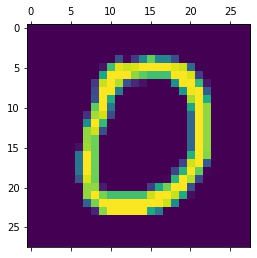

In [4]:
plt.matshow(x_test[10])

In [29]:
n = x_train[0].size
m = len(x_train)
x_train_flatten = x_train.reshape((m, n))
x_test_flatten = x_test.reshape((len(x_test),n))

x_train_flatten = x_train_flatten/255
x_test_flatten = x_test_flatten/255

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(n,), activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [37]:
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 0.7236 - accuracy: 0.8115
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3089 - accuracy: 0.9115
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2867 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2757 - accuracy: 0.9215
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2655 - accuracy: 0.9252


In [38]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2664 - accuracy: 0.9260


[0.2664012312889099, 0.9259999990463257]

In [51]:
predictions = model.predict(x_test_flatten)


In [56]:
y_predictions = predictions.argmax(axis=1)
# y_predictions.shape

(10000,)

In [61]:
y_predictions[10]

0

In [64]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predictions)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    6,    4,    2,    1,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    9,  922,   21,   10,    3,   11,   10,   40,    3],
       [   2,    0,   16,  928,    1,   17,    2,    9,   27,    8],
       [   2,    1,    4,    1,  919,    0,    9,    4,   11,   31],
       [   8,    3,    4,   48,   10,  751,   12,    7,   42,    7],
       [  13,    3,    9,    1,    8,   11,  905,    2,    6,    0],
       [   1,    6,   21,    7,    7,    0,    0,  947,    3,   36],
       [   6,    8,    5,   18,    9,   16,    6,    9,  889,    8],
       [  10,    7,    1,    9,   25,    4,    0,   18,   11,  924]],
      dtype=int32)>

Text(69.0, 0.5, 'True Values')

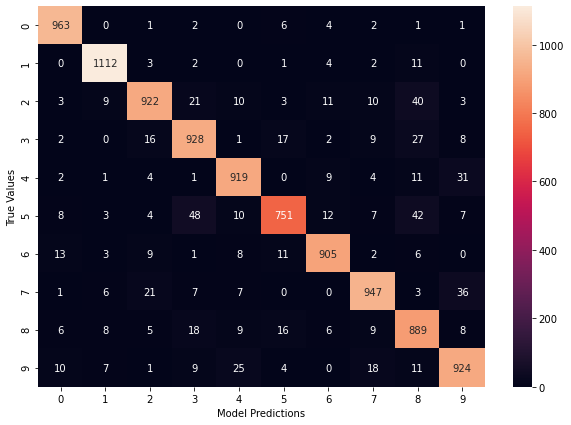

In [75]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Model Predictions")
plt.ylabel("True Values")

In [79]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(n,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [82]:
model2.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9875
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9891
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0223 - accuracy: 0.9935
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0183 - accuracy: 0.9945


In [83]:
model2.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0822 - accuracy: 0.9768


[0.08221349120140076, 0.9768000245094299]

In [84]:
predictions2 = model2.predict(x_test_flatten)

In [87]:
y_predictions2 = predictions2.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [88]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions = y_predictions2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    1,    0,    0,    2,    1,    3,    0],
       [   0, 1123,    3,    1,    0,    2,    2,    1,    3,    0],
       [   8,    1,  999,    4,    1,    0,    4,    7,    8,    0],
       [   2,    0,    2,  991,    0,    8,    0,    2,    5,    0],
       [   4,    0,    0,    1,  960,    0,    5,    3,    1,    8],
       [   1,    0,    0,    3,    1,  878,    4,    1,    2,    2],
       [   5,    2,    2,    1,    4,    3,  939,    0,    2,    0],
       [   2,    5,    9,    3,    1,    0,    0,  999,    3,    6],
       [   4,    0,    1,    2,    7,    6,    1,    4,  943,    6],
       [   3,    4,    0,    6,   16,    3,    0,   11,    2,  964]],
      dtype=int32)>

Text(69.0, 0.5, 'True Values')

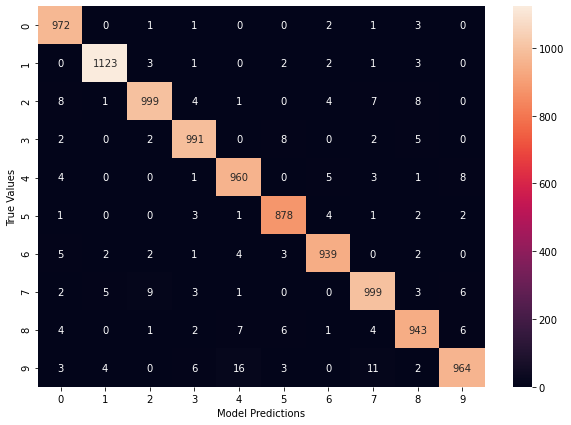

In [89]:
plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True, fmt="d")
plt.xlabel("Model Predictions")
plt.ylabel("True Values")